In [191]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

# Load the dataset
df = pd.read_csv("cleaned_utah.csv")

# Drop unnecessary column
df = df.drop(columns=["Unnamed: 0"])


In [208]:
print("✅ Cleaned Data Sample:")
display(df.head())


✅ Cleaned Data Sample:


,year_built,beds,baths,baths_full,garage,sqft,stories,listPrice,property_type,property_type_encoded
0,2003.0,4.0,0.0,2.0,2.0,2400.0,2.0,70000.0,Affordable,0
1,2003.0,3.0,3.0,2.0,2.0,1606.0,2.0,409990.0,Average,1
2,2003.0,3.0,3.0,2.0,2.0,1606.0,2.0,414990.0,Average,1
3,2020.0,3.0,3.0,2.0,2.0,1736.0,2.0,475000.0,Average,1
4,2003.0,4.0,0.0,2.0,2.0,2400.0,2.0,49000.0,Affordable,0


In [192]:
df = df.drop_duplicates()

In [193]:
df = df.reset_index(drop=True)

In [194]:
# Step 1: Encode the target variable
le = LabelEncoder()
df['property_type_encoded'] = le.fit_transform(df['property_type'])

In [195]:
# Step 2: Define features and target (exclude listPrice)
X = df.drop(columns=['property_type', 'property_type_encoded', 'listPrice'])
y = df['property_type_encoded']

In [196]:
X = X.astype(int)

In [197]:
# Step 1: Drop duplicates based on features only
Xy = df.drop_duplicates(subset=X.columns.tolist())

# Step 2: Define X and y again from the deduplicated data
X = Xy.drop(columns=['property_type', 'property_type_encoded'])
y = Xy['property_type_encoded']

# Step 3: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


In [198]:
import pandas as pd

# Combine features and target for display
train_preview = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
test_preview = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)

# Rename target column for clarity
train_preview = train_preview.rename(columns={'property_type_encoded': 'Target'})
test_preview = test_preview.rename(columns={'property_type_encoded': 'Target'})

# Display head of each
print("🧠 Training Data Sample:")
print(train_preview.head(), "\n")

print("🧪 Testing Data Sample:")
print(test_preview.head())


🧠 Training Data Sample:
   year_built  beds  baths  baths_full  garage    sqft  stories  listPrice  \
0      2011.0   3.0    2.0         2.0     2.0  1380.0      2.0   324900.0   
1      2022.0   3.0    3.0         2.0     2.0  1495.0      2.0   390000.0   
2      2016.0   3.0    3.0         2.0     2.0  2362.0      2.0   549900.0   
3      2003.0   3.0    3.0         2.0     2.0  2505.0      2.0   589990.0   
4      2003.0   2.0    3.0         2.0     2.0  1708.0      2.0   635000.0   

   Target  
0       0  
1       0  
2       1  
3       1  
4       1   

🧪 Testing Data Sample:
   year_built  beds  baths  baths_full  garage    sqft  stories  listPrice  \
0      2003.0   4.0    3.0         2.0     2.0  2828.0      2.0   490000.0   
1      2003.0   3.0    3.0         2.0     2.0  2141.0      2.0   448900.0   
2      2021.0   3.0    3.0         2.0     2.0  1826.0      2.0   550000.0   
3      2003.0   3.0    3.0         2.0     2.0  1310.0      2.0   528995.0   
4      2003.0   2.0 

In [199]:
# Convert each row to a string for easy comparison
train_rows = X_train.astype(str).agg('-'.join, axis=1)
test_rows = X_test.astype(str).agg('-'.join, axis=1)

# Check for overlapping rows
common_rows = set(train_rows).intersection(set(test_rows))

# Display result
if common_rows:
    print(f"❌ Not disjoint: {len(common_rows)} overlapping rows found.")
else:
    print("✅ X_train and X_test are disjoint.")


✅ X_train and X_test are disjoint.


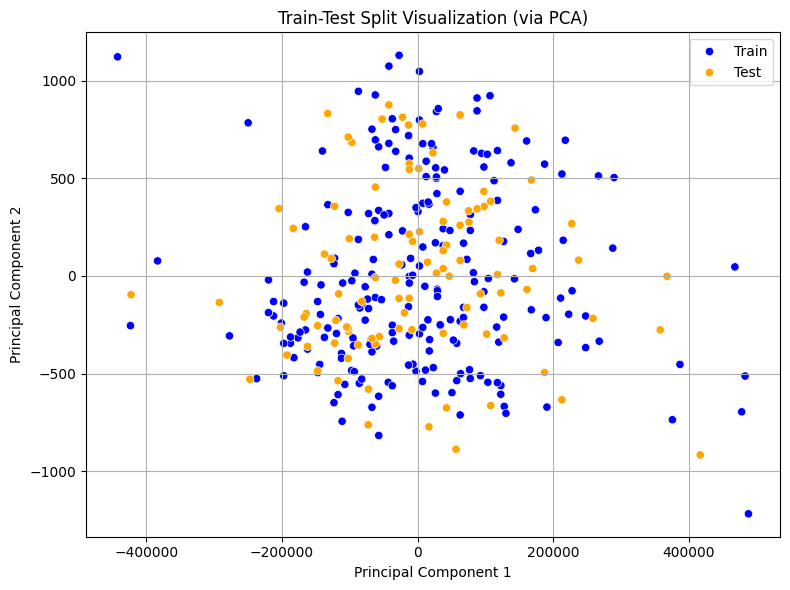

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Combine train and test for plotting
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
X_train_copy['split'] = 'Train'
X_test_copy['split'] = 'Test'

plot_df = pd.concat([X_train_copy, X_test_copy], axis=0)

# Optional: reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(plot_df.drop(columns='split'))

plot_df['PC1'] = X_pca[:, 0]
plot_df['PC2'] = X_pca[:, 1]

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=plot_df, x='PC1', y='PC2', hue='split', palette=['blue', 'orange'])
plt.title("Train-Test Split Visualization (via PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [201]:
# Step 4: Train Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [202]:
# Step 5: Evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.9897959183673469

Classification Report:
               precision    recall  f1-score   support

  Affordable       1.00      0.95      0.98        21
     Average       0.98      1.00      0.99        65
      Luxury       1.00      1.00      1.00        12

    accuracy                           0.99        98
   macro avg       0.99      0.98      0.99        98
weighted avg       0.99      0.99      0.99        98



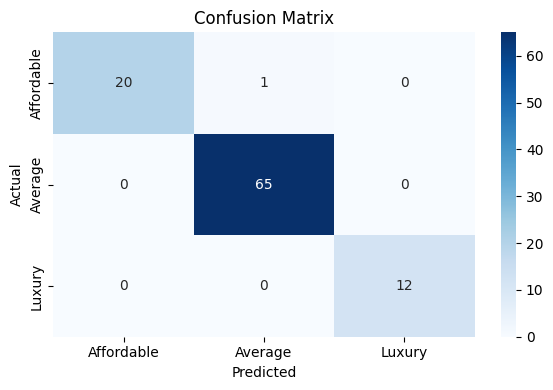

In [203]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

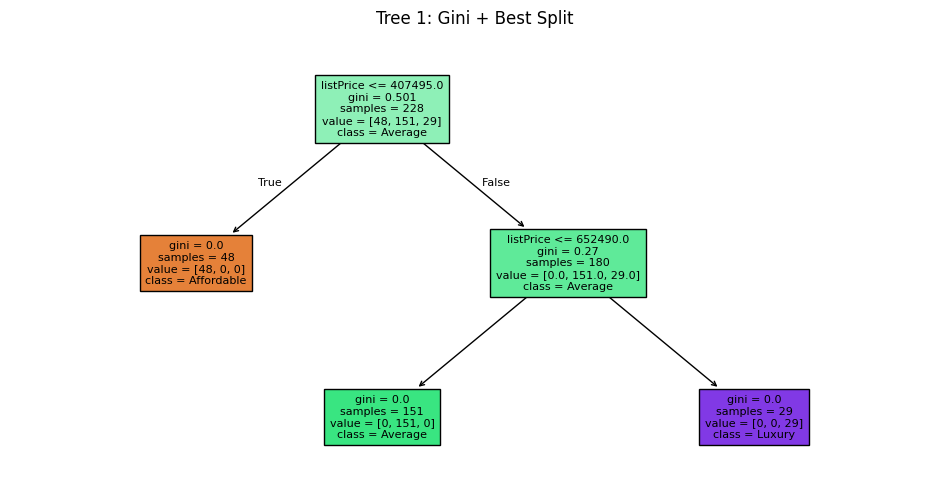

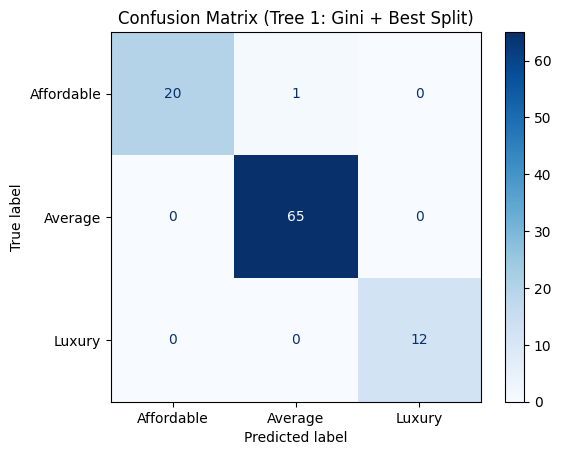

📊 Classification Report for Tree 1: Gini + Best Split
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.98      1.00      0.99        65
           2       1.00      1.00      1.00        12

    accuracy                           0.99        98
   macro avg       0.99      0.98      0.99        98
weighted avg       0.99      0.99      0.99        98

✅ Accuracy for Tree 1: Gini + Best Split: 98.98%


In [204]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Function to train and plot a decision tree with given parameters
def train_and_plot_tree(X_train, y_train, X_test, y_test, criterion, splitter, max_depth, title):
    clf = DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)

    # Plot the tree
    plt.figure(figsize=(12, 6))
    plot_tree(clf, feature_names=X_train.columns, class_names=le.classes_, filled=True, fontsize=8)
    plt.title(title)
    plt.show()

    # Predict and evaluate
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix ({title})')
    plt.show()

    # Print classification report and accuracy
    print(f"📊 Classification Report for {title}")
    print(classification_report(y_test, y_pred, zero_division=0))
    print(f"✅ Accuracy for {title}: {acc * 100:.2f}%")
    print("="*60)


train_and_plot_tree(
    X_train, y_train, X_test, y_test,
    criterion='gini', splitter='best', max_depth=3,
    title='Tree 1: Gini + Best Split'
)



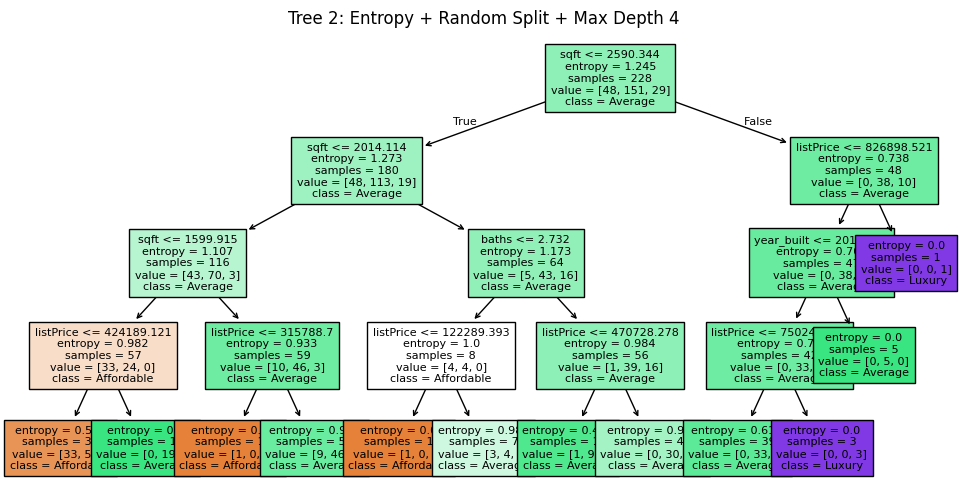

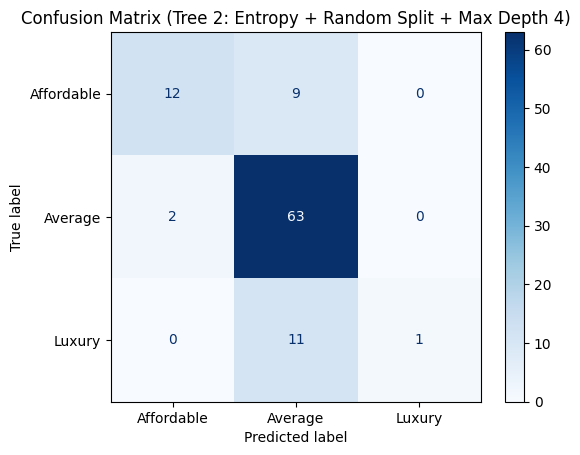

📊 Classification Report for Tree 2: Entropy + Random Split + Max Depth 4
              precision    recall  f1-score   support

           0       0.86      0.57      0.69        21
           1       0.76      0.97      0.85        65
           2       1.00      0.08      0.15        12

    accuracy                           0.78        98
   macro avg       0.87      0.54      0.56        98
weighted avg       0.81      0.78      0.73        98

✅ Accuracy for Tree 2: Entropy + Random Split + Max Depth 4: 77.55%


In [205]:
train_and_plot_tree(
    X_train, y_train, X_test, y_test,
    criterion='entropy', splitter='random', max_depth=4,
    title='Tree 2: Entropy + Random Split + Max Depth 4'
)

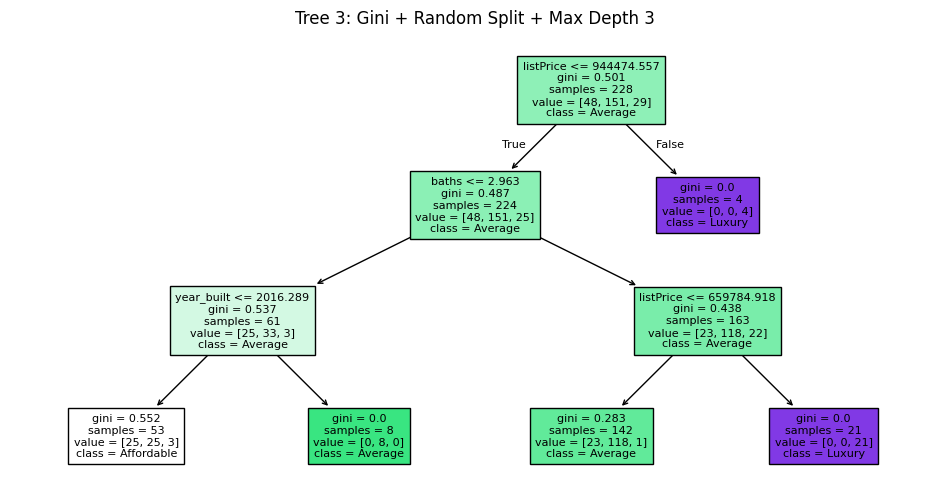

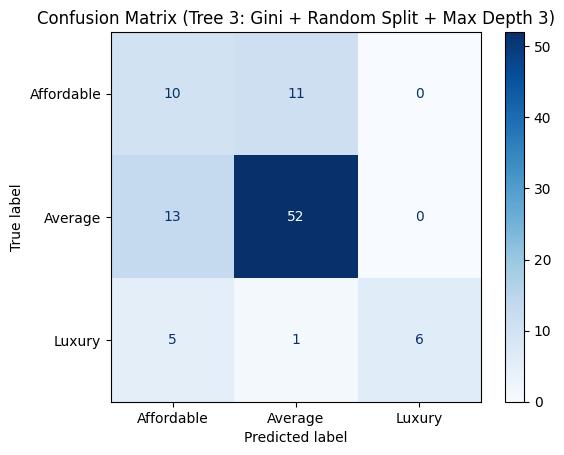

📊 Classification Report for Tree 3: Gini + Random Split + Max Depth 3
              precision    recall  f1-score   support

           0       0.36      0.48      0.41        21
           1       0.81      0.80      0.81        65
           2       1.00      0.50      0.67        12

    accuracy                           0.69        98
   macro avg       0.72      0.59      0.63        98
weighted avg       0.74      0.69      0.70        98

✅ Accuracy for Tree 3: Gini + Random Split + Max Depth 3: 69.39%


In [206]:
train_and_plot_tree(
    X_train, y_train, X_test, y_test,
    criterion='gini', splitter='random', max_depth=3,
    title='Tree 3: Gini + Random Split + Max Depth 3'
)